<a href="https://colab.research.google.com/github/GuihJF/python_for_data_analysis/blob/Python-Data-Test/Data_Test_Python_for_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# Exploratory Python Script – Data Analysis Journey
# ----------------------------------------------------
# Purpose: This file was used to test and explore the dataset incrementally.
# It helped validate calculations, debug logic, and build confidence prior to developing the final report.
# This work highlights my hands-on approach when analyzing real-world data.

# Author Information:
name = "Guilherme"
age = 25
country = "Brazil"
current_role = "Service Desk Specialist – Global L1 Support"
aspiration = "Data Analyst / Data Engineer"
skills = ["Python", "Excel", "SQL", "Power BI", "Technical Support"]

# Project Overview:
project_title = "Python for Data: From Scratch to Complete Analysis"
project_goal = (
    "Apply core Python skills to read, clean, and analyze public datasets. "
    "This test file documents my iterative process—experimentation, debugging, and logic validation—leading up to final insights."
)

In [4]:
# Google Drive Connection:
from google.colab import drive
drive.mount('/content/drive')

# File Address:
caminho_dados = '/content/drive/My Drive/AD/2023_Viagem.csv'

Mounted at /content/drive


In [5]:
# Pandas to data analisys:
import pandas as pd
import matplotlib.pyplot as plt

# Reading the file into a variable / # encoding format definition / # Delimiter definition ';'
df_viagens = pd.read_csv(caminho_dados, encoding='windows-1252', delimiter=';')

# Defining no columns limit:
pd.set_option('display.max_columns', None)

In [6]:
# Previewing the first rows of the dataset to verify successful import and inspect column structure
df_viagens.head()

,Identificador do processo de viagem,Número da Proposta (PCDP),Situação,Viagem Urgente,Justificativa Urgência Viagem,Código do órgão superior,Nome do órgão superior,Código órgão solicitante,Nome órgão solicitante,CPF viajante,Nome,Cargo,Função,Descrição Função,Período - Data de início,Período - Data de fim,Destinos,Motivo,Valor diárias,Valor passagens,Valor devolução,Valor outros gastos
0,17821923,000001/23-1C,Realizada,NÃO,Sem informação,26000,Ministério da Educação,26352,Fundação Universidade Federal do ABC,***.875.238-**,PRISCILA LEAL DA SILVA,PROFESSOR DO MAGISTERIO SUPERIOR,-1,Sem informação,01/01/2023,02/12/2023,Loughborough/Reino Unido,Intercâmbio acadêmico PCDP anterior 07/21-3C,"0,00","0,00","0,00","0,00"
1,18159396,000001/23,Realizada,NÃO,Sem informação,26000,Ministério da Educação,26271,Fundação Universidade de Brasília,***.000.000-**,Ekaterina Pavlovskaia,NaN,-1,Sem informação,25/02/2023,06/03/2023,Pirenópolis/GO,Segue abaixo cópia da carta-convite enviada à ...,"0,00","7894,50","0,00","0,00"
2,18236583,000018/23,Realizada,NÃO,Sem informação,26000,Ministério da Educação,26236,Universidade Federal Fluminense,NaN,CAMILLA DUARTE DA SILVA,BIBLIOTECARIO-DOCUMENTALISTA,-1,Sem informação,16/01/2023,28/02/2024,Rio de Janeiro/RJ,Afastamento para pós-graduação stricto sensu n...,"0,00","0,00","0,00","0,00"
3,18288418,000007/23-1C,Realizada,SIM,Por necessidade do serviço.,52000,Ministério da Defesa,52121,Comando do Exército,***.621.358-**,ANDRE LUIS COSTA PITANGUEIRA,NaN,OfSuperior,OfSuperior,10/01/2023,29/01/2023,Nova York/Estados Unidos da América,Participar da revisão do COE Manual (Contingen...,"39565,70","7434,13","0,00","1095,35"
4,18296348,000070/23,Realizada,SIM,A efetivação do empenho no Siafi e a respectiv...,26000,Ministério da Educação,26406,Instituto Federal do Espírito Santo,***.407.547-**,LIDIANY MIRANDA FERRAZ NUNES,AUXILIAR DE BIBLIIOTECA,-1,Sem informação,05/02/2023,10/02/2023,Vitória/ES,Participação das aulas de Mestrado Interinstit...,"1013,96","0,00","0,00","0,00"


In [7]:
# Selecting and displaying the 'Nome do órgão superior' column to inspect values
df_viagens["Nome do órgão superior"]

,Nome do órgão superior
0,Ministério da Educação
1,Ministério da Educação
2,Ministério da Educação
3,Ministério da Defesa
4,Ministério da Educação
...,...
831006,Sem informação
831007,Sem informação
831008,Sem informação
831009,Sem informação


In [8]:
# Method 1 – Using a predefined variable (more reusable for further processing)
multiple_columns = ["Valor diárias", "Nome"]
df_viagens[multiple_columns]

# Method 2 – Inline declaration (ideal for quick visual checks)
df_viagens[["Valor diárias", "Nome"]]

,Valor diárias,Nome
0,"0,00",PRISCILA LEAL DA SILVA
1,"0,00",Ekaterina Pavlovskaia
2,"0,00",CAMILLA DUARTE DA SILVA
3,"39565,70",ANDRE LUIS COSTA PITANGUEIRA
4,"1013,96",LIDIANY MIRANDA FERRAZ NUNES
...,...,...
831006,"606,89",BIANCA VIANA CARDOSO KIVEL
831007,"1089,00",LUCAS ALVES FREIRE
831008,"734,13",SERGIO BOTELHO
831009,"319,28",NELSON CAMPOS REIS JUNIOR


In [9]:
# Text normalization: standardize organization names
# Convert to uppercase and abbreviate common terms for consistency

(
    df_viagens["Nome do órgão superior"]
    .str.upper()
    .str.replace(
        'MINISTÉRIO',
        'MIN.')
)

,Nome do órgão superior
0,MIN. DA EDUCAÇÃO
1,MIN. DA EDUCAÇÃO
2,MIN. DA EDUCAÇÃO
3,MIN. DA DEFESA
4,MIN. DA EDUCAÇÃO
...,...
831006,SEM INFORMAÇÃO
831007,SEM INFORMAÇÃO
831008,SEM INFORMAÇÃO
831009,SEM INFORMAÇÃO


In [10]:
# Select expense-related columns for aggregation
df_viagens[["Valor diárias", "Valor passagens"]]

,Valor diárias,Valor passagens
0,"0,00","0,00"
1,"0,00","7894,50"
2,"0,00","0,00"
3,"39565,70","7434,13"
4,"1013,96","0,00"
...,...,...
831006,"606,89","3331,29"
831007,"1089,00","1837,18"
831008,"734,13","4555,95"
831009,"319,28","3745,53"


In [11]:
# Fix for data type mismatch: convert text to numeric before summing
(
    df_viagens
    ["Valor diárias"] +

    df_viagens["Valor passagens"]
 )

,0
0,"0,000,00"
1,"0,007894,50"
2,"0,000,00"
3,"39565,707434,13"
4,"1013,960,00"
...,...
831006,"606,893331,29"
831007,"1089,001837,18"
831008,"734,134555,95"
831009,"319,283745,53"


In [12]:
# Standardize and convert 'Valor diárias' to float format
df_viagens['Valor diárias'] = df_viagens['Valor diárias'].str.replace(",", ".").astype(float)

In [13]:
# Inspect updated 'Valor diárias' column to confirm conversion and values
df_viagens['Valor diárias']

,Valor diárias
0,0.00
1,0.00
2,0.00
3,39565.70
4,1013.96
...,...
831006,606.89
831007,1089.00
831008,734.13
831009,319.28


In [14]:
# Normalize monetary fields: convert string with commas to float
df_viagens["Valor passagens"] = df_viagens["Valor passagens"].astype(str).str.replace(",", ".").astype(float)
df_viagens["Valor devolução"] = df_viagens["Valor devolução"].astype(str).str.replace(",", ".").astype(float)
df_viagens["Valor outros gastos"] = df_viagens["Valor outros gastos"].astype(str).str.replace(",", ".").astype(float)

In [15]:
# Overview of dataframe structure, types, and non-null counts
df_viagens.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 831011 entries, 0 to 831010
Data columns (total 22 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   Identificador do processo de viagem  831011 non-null  int64  
 1   Número da Proposta (PCDP)            831011 non-null  object 
 2   Situação                             831011 non-null  object 
 3   Viagem Urgente                       831011 non-null  object 
 4   Justificativa Urgência Viagem        830909 non-null  object 
 5   Código do órgão superior             831011 non-null  int64  
 6   Nome do órgão superior               831011 non-null  object 
 7   Código órgão solicitante             831011 non-null  int64  
 8   Nome órgão solicitante               831011 non-null  object 
 9   CPF viajante                         750075 non-null  object 
 10  Nome                                 831011 non-null  object 
 11  Cargo        

In [16]:
# Data types have been successfully adjusted, allowing proper arithmetic operations
total_gastos = df_viagens["Valor diárias"] + df_viagens["Valor passagens"]

In [17]:
# Computes total trip expenses by aggregating daily rates, ticket fares, and additional costs
df_viagens['Despesas'] = (
    df_viagens['Valor diárias'] +
    df_viagens['Valor passagens'] +
    df_viagens['Valor outros gastos']
)

In [18]:
# Total expenses per trip stored in 'Despesas'
df_viagens['Despesas']

,Despesas
0,0.00
1,7894.50
2,0.00
3,48095.18
4,1013.96
...,...
831006,3938.18
831007,2926.18
831008,5290.08
831009,4464.81


In [19]:
# Calculate the percentage of trips taken by each position
cargo_counts = df_viagens['Cargo'].value_counts(normalize=True) * 100

# Transform the result into a DataFrame for better readability
cargo_freq = cargo_counts.reset_index()

# Rename the columns for clarity
cargo_freq.columns = ['Cargo', 'Proporção de Viagens (%)']

# Display the final frequency table
display(cargo_freq)

,Cargo,Proporção de Viagens (%)
0,Informações protegidas por sigilo,23.377849
1,PROFESSOR DO MAGISTERIO SUPERIOR,10.831317
2,PROFESSOR ENS BASICO TECN TECNOLOGICO,7.435823
3,CONTRATADO LEI 8745/93 - NI,3.510763
4,AUDITOR FISCAL FEDERAL AGROPECUARIO,3.273515
...,...,...
818,ANALISTA II,0.000197
819,COSTUREIRO,0.000197
820,ANALISTA DE CONTROLE ECON FINANCEIRO SR,0.000197
821,MEDICO I - 36HORAS,0.000197


In [20]:
# Format float numbers to show two decimal places (e.g., 1234.56)
pd.set_option('display.float_format', '{:.2f}'.format)

# Calculate total expenses per job position and sort in descending order
cargo_despesas = (
    df_viagens.groupby('Cargo')['Despesas']
    .sum()
    .reset_index()
    .sort_values(by='Despesas', ascending=False)
)

# Display the result
display(cargo_despesas)

,Cargo,Despesas
444,Informações protegidas por sigilo,376291588.90
569,PROFESSOR DO MAGISTERIO SUPERIOR,111444418.35
570,PROFESSOR ENS BASICO TECN TECNOLOGICO,52872603.52
687,TECNICO DO SEGURO SOCIAL,46002065.53
72,ANALISTA AMBIENTAL,35397636.03
...,...,...
152,ASG - OPERADOR DE MAQUINA E EQUIPAMENTOS,0.00
725,TECNICO EM GEOLOGIA,0.00
735,TECNICO EM METALURGIA,0.00
302,CENOTECNICO,0.00


In [21]:
# Calculate percentage distribution of trips by job role
viagens_por_cargo = (
    df_viagens["Cargo"]                 # Select job position column
    .value_counts(normalize=True)       # Calculate proportional frequency
    .rename("Trips proportion:") * 100  # Rename and scale to percentage
).reset_index()                         # Convert Series to DataFrame

In [22]:
# Keep only job roles where trips are more than 1% of the total
filtro_mais_de_1_pct = viagens_por_cargo['Trips proportion:'] > 1

In [23]:
# Creates a filter to select only the positions that start with 'TECNICO'
filtro_eh_tecnico = viagens_por_cargo['Cargo'].str.startswith('TECNICO')

In [24]:
# Shows only 'TECNICO' jobs that have more than 1% of all trips to focus on the most common ones
viagens_por_cargo[filtro_eh_tecnico & filtro_mais_de_1_pct]

,Cargo,Trips proportion:
7,TECNICO INFOR GEOGRAFICAS E ESTATISTICA,2.14
8,TECNICO DO SEGURO SOCIAL,2.11
14,TECNICO AMBIENTAL,1.18


In [25]:
# Calculates total travel expenses per job role to find out which roles cost the most
gastos_totais_por_cargo = df_viagens.groupby('Cargo')['Despesas'].sum().reset_index()

# Counts how many trips each role made, including entries with missing job titles (NaN)
df_viagens['Cargo'].value_counts(dropna=False)

,count
Cargo,
NaN,324369
Informações protegidas por sigilo,118442
PROFESSOR DO MAGISTERIO SUPERIOR,54876
PROFESSOR ENS BASICO TECN TECNOLOGICO,37673
CONTRATADO LEI 8745/93 - NI,17787
...,...
ANALISTA II,1
COSTUREIRO,1
ANALISTA DE CONTROLE ECON FINANCEIRO SR,1


In [26]:
# Displays all job positions (not just technical) with more than 1% of total trips
viagens_por_cargo[filtro_mais_de_1_pct]

,Cargo,Trips proportion:
0,Informações protegidas por sigilo,23.38
1,PROFESSOR DO MAGISTERIO SUPERIOR,10.83
2,PROFESSOR ENS BASICO TECN TECNOLOGICO,7.44
3,CONTRATADO LEI 8745/93 - NI,3.51
4,AUDITOR FISCAL FEDERAL AGROPECUARIO,3.27
5,ANALISTA AMBIENTAL,2.69
6,ASSISTENTE EM ADMINISTRAçãO,2.32
7,TECNICO INFOR GEOGRAFICAS E ESTATISTICA,2.14
8,TECNICO DO SEGURO SOCIAL,2.11
9,AUDITOR-FISCAL DA RECEITA FEDERAL BRASIL,1.99


In [28]:
# Fill missing values in the 'Cargo' column with a default label
df_viagens['Cargo'] = df_viagens['Cargo'].fillna(value='INDEFINIDO')

In [29]:
# Display the cleaned and transformed DataFrame for verification
df_viagens

,Identificador do processo de viagem,Número da Proposta (PCDP),Situação,Viagem Urgente,Justificativa Urgência Viagem,Código do órgão superior,Nome do órgão superior,Código órgão solicitante,Nome órgão solicitante,CPF viajante,Nome,Cargo,Função,Descrição Função,Período - Data de início,Período - Data de fim,Destinos,Motivo,Valor diárias,Valor passagens,Valor devolução,Valor outros gastos,Despesas
0,17821923,000001/23-1C,Realizada,NÃO,Sem informação,26000,Ministério da Educação,26352,Fundação Universidade Federal do ABC,***.875.238-**,PRISCILA LEAL DA SILVA,PROFESSOR DO MAGISTERIO SUPERIOR,-1,Sem informação,01/01/2023,02/12/2023,Loughborough/Reino Unido,Intercâmbio acadêmico PCDP anterior 07/21-3C,0.00,0.00,0.00,0.00,0.00
1,18159396,000001/23,Realizada,NÃO,Sem informação,26000,Ministério da Educação,26271,Fundação Universidade de Brasília,***.000.000-**,Ekaterina Pavlovskaia,INDEFINIDO,-1,Sem informação,25/02/2023,06/03/2023,Pirenópolis/GO,Segue abaixo cópia da carta-convite enviada à ...,0.00,7894.50,0.00,0.00,7894.50
2,18236583,000018/23,Realizada,NÃO,Sem informação,26000,Ministério da Educação,26236,Universidade Federal Fluminense,NaN,CAMILLA DUARTE DA SILVA,BIBLIOTECARIO-DOCUMENTALISTA,-1,Sem informação,16/01/2023,28/02/2024,Rio de Janeiro/RJ,Afastamento para pós-graduação stricto sensu n...,0.00,0.00,0.00,0.00,0.00
3,18288418,000007/23-1C,Realizada,SIM,Por necessidade do serviço.,52000,Ministério da Defesa,52121,Comando do Exército,***.621.358-**,ANDRE LUIS COSTA PITANGUEIRA,INDEFINIDO,OfSuperior,OfSuperior,10/01/2023,29/01/2023,Nova York/Estados Unidos da América,Participar da revisão do COE Manual (Contingen...,39565.70,7434.13,0.00,1095.35,48095.18
4,18296348,000070/23,Realizada,SIM,A efetivação do empenho no Siafi e a respectiv...,26000,Ministério da Educação,26406,Instituto Federal do Espírito Santo,***.407.547-**,LIDIANY MIRANDA FERRAZ NUNES,AUXILIAR DE BIBLIIOTECA,-1,Sem informação,05/02/2023,10/02/2023,Vitória/ES,Participação das aulas de Mestrado Interinstit...,1013.96,0.00,0.00,0.00,1013.96
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
831006,2023001618,Sem informaçã,Realizada,NÃO,Sem informação,-1,Sem informação,-1,Sem informação,***.748.269-**,BIANCA VIANA CARDOSO KIVEL,ANALISTA DO BANCO CENTRAL,-1,Sem informação,05/12/2023,06/12/2023,Sem informação,Participar de tratativas nos locais das reuniõ...,606.89,3331.29,0.00,0.00,3938.18
831007,2023001619,Sem informaçã,Realizada,NÃO,Sem informação,-1,Sem informação,-1,Sem informação,***.231.806-**,LUCAS ALVES FREIRE,PROCURADOR DO BANCO CENTRAL,-1,Sem informação,11/12/2023,13/12/2023,Sem informação,Participar da reunião do COPOM .,1089.00,1837.18,0.00,0.00,2926.18
831008,2023001628,Sem informaçã,Realizada,NÃO,Sem informação,-1,Sem informação,-1,Sem informação,***.632.011-**,SERGIO BOTELHO,TECNICO DO BANCO CENTRAL,-1,Sem informação,07/12/2023,08/12/2023,Sem informação,Acompanhamento do Presidente do BC - São Paulo,734.13,4555.95,0.00,0.00,5290.08
831009,2023001631,Sem informaçã,Realizada,NÃO,Sem informação,-1,Sem informação,-1,Sem informação,***.407.445-**,NELSON CAMPOS REIS JUNIOR,TECNICO DO BANCO CENTRAL,-1,Sem informação,11/12/2023,11/12/2023,Sem informação,Acompanhamento do Presidente - São Paulo.,319.28,3745.53,0.00,400.00,4464.81


In [30]:
# Convert start and end date columns to datetime format (day/month/year)
df_viagens['Período - Data de início'] = pd.to_datetime(df_viagens['Período - Data de início'], format = '%d/%m/%Y')
df_viagens['Período - Data de fim'] = pd.to_datetime(df_viagens['Período - Data de fim'], format = '%d/%m/%Y')

# Derive new columns: month name of trip and trip duration in days
df_viagens['Mês da viagem'] = df_viagens['Período - Data de início'].dt.month_name()
df_viagens['Dias de viagem'] = (df_viagens['Período - Data de fim'] - df_viagens['Período - Data de início']).dt.days

In [31]:
# Summarizing travel data by job position (Cargo):
# Calculates average expenses and trip duration
# Computes total expenses and number of trips
# Identifies the most frequent destination per position

resumo_por_cargo = (
    df_viagens
    .groupby('Cargo')
    .agg(
        despesa_media=('Despesas', 'mean'), # Average expenses per trip
        duracao_media=('Dias de viagem', 'mean'), # Average travel duration in days
        despesas_totais=('Despesas', 'sum'), # Total expenses per position
        destino_mais_frequente=('Destinos', pd.Series.mode), # Most frequent travel destination
        n_viagens=('Nome', 'count') # Number of trips per position

    )
    .reset_index()
)

display(resumo_por_cargo)


,Cargo,despesa_media,duracao_media,despesas_totais,destino_mais_frequente,n_viagens
0,AAD-AUX DE RECURSOS MATERIAIS,3592.10,9.40,17960.50,Foz do Iguaçu/PR,5
1,AAD-AUXILIAR ADMINISTRATIVO,115.76,0.00,1620.65,Alcantil/PB,14
2,AAD-AUXILIAR DE OPERACOES,7973.39,16.71,55813.76,Brasília/DF,7
3,AAD-AUXILIAR DE RECURSOS FINANCEIROS,15545.94,5.50,31091.89,"[Paris/França, Rio de Janeiro/RJ]",2
4,AAD-OPERADOR DE MICROCOMPUTADOR,1186.47,4.00,1186.47,Petrolina/PE,1
...,...,...,...,...,...,...
819,VICE-PRESIDENTE DA REPUBLICA,7068.20,1.50,14136.40,"[Lisboa/Portugal, Quito/Equador]",2
820,VIDREIRO,0.00,6.00,0.00,Brasília/DF,1
821,VIGILANTE,693.31,1.79,739763.32,Três Rios/RJ,1067
822,VISITADOR SANITARIO,1402.57,3.88,58907.74,Guajará-Mirim/RO,42


In [34]:
# Calculate the percentage distribution of trips by job position (Cargo)
# Uses value_counts with normalize=True to get relative frequencies
# Converts the result into a DataFrame for easier handling and display

df_cargos = df_viagens['Cargo'].value_counts(normalize=True).reset_index()
df_cargos.columns = ['Cargo', 'Percentual de Viagens']  # Rename columns for clarity

# Display the percentage of total trips per job position
df_cargos

,Cargo,Percentual de Viagens
0,INDEFINIDO,0.39
1,Informações protegidas por sigilo,0.14
2,PROFESSOR DO MAGISTERIO SUPERIOR,0.07
3,PROFESSOR ENS BASICO TECN TECNOLOGICO,0.05
4,CONTRATADO LEI 8745/93 - NI,0.02
...,...,...
819,ANALISTA II,0.00
820,COSTUREIRO,0.00
821,ANALISTA DE CONTROLE ECON FINANCEIRO SR,0.00
822,MEDICO I - 36HORAS,0.00


In [44]:
# Show the names of job positions (Cargo) that made more than 1% of all trips
df_cargos.loc[df_cargos['Percentual de Viagens'] > 0.01, 'Cargo']

,Cargo
0,INDEFINIDO
1,Informações protegidas por sigilo
2,PROFESSOR DO MAGISTERIO SUPERIOR
3,PROFESSOR ENS BASICO TECN TECNOLOGICO
4,CONTRATADO LEI 8745/93 - NI
5,AUDITOR FISCAL FEDERAL AGROPECUARIO
6,ANALISTA AMBIENTAL
7,ASSISTENTE EM ADMINISTRAçãO
8,TECNICO INFOR GEOGRAFICAS E ESTATISTICA
9,TECNICO DO SEGURO SOCIAL


In [46]:
# Create a consolidated summary table of travel data by job position (Cargo)
df_viagens_consolidado = (

    df_viagens
    .groupby('Cargo')  # Groups the data by the 'Cargo' column (job positions)
    .agg(  # Applies multiple summary calculations for each group:
        despesa_media=('Despesas', 'mean'),                  # Average expenses per trip
        duracao_media=('Dias de viagem', 'mean'),            # Average trip duration (in days)
        despesas_totais=('Despesas', 'sum'),                 # Total expenses for each position
        destino_mais_frequente=('Destinos', pd.Series.mode), # Most frequent destination
        n_viagens=('Nome', 'count')                          # Total number of trips
    )
    .reset_index()  # Converts the grouped result into a standard DataFrame
)

In [51]:
# Select job positions ('Cargo') responsible for more than 1% of all trips
cargos_relevantes = df_cargos.loc[df_cargos['Percentual de Viagens'] > 0.01, 'Cargo']

In [53]:
# Filter rows where the job position ('Cargo') is among those with >1% of total trips
filtro = df_viagens_consolidado['Cargo'].isin(cargos_relevantes)

In [55]:
# Sort the final summary table by number of trips (n_viagens), in ascending order
df_final = df_final.sort_values(by='n_viagens', ascending=True)

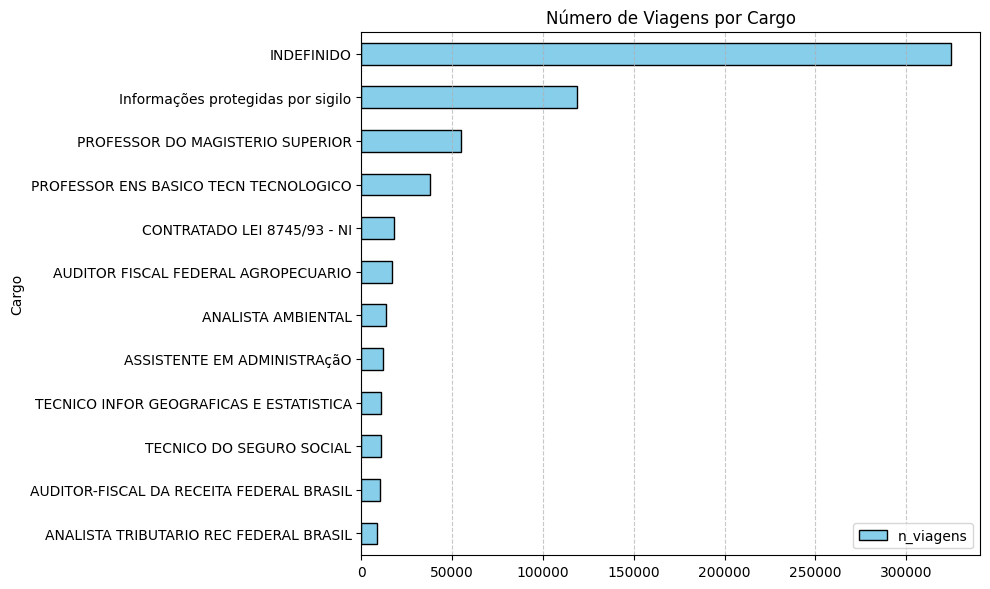

In [66]:
# Create a horizontal bar chart showing the number of trips per job position
df_final.plot(x='Cargo', y='n_viagens', kind='barh', figsize=(10, 6), color='skyblue', edgecolor='black')

plt.title('Número de Viagens por Cargo')
plt.ylabel('Cargo')
plt.tight_layout()
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

In [67]:
# Display the complete travel data table
df_viagens

,Identificador do processo de viagem,Número da Proposta (PCDP),Situação,Viagem Urgente,Justificativa Urgência Viagem,Código do órgão superior,Nome do órgão superior,Código órgão solicitante,Nome órgão solicitante,CPF viajante,Nome,Cargo,Função,Descrição Função,Período - Data de início,Período - Data de fim,Destinos,Motivo,Valor diárias,Valor passagens,Valor devolução,Valor outros gastos,Despesas,Mês da viagem,Dias de viagem
0,17821923,000001/23-1C,Realizada,NÃO,Sem informação,26000,Ministério da Educação,26352,Fundação Universidade Federal do ABC,***.875.238-**,PRISCILA LEAL DA SILVA,PROFESSOR DO MAGISTERIO SUPERIOR,-1,Sem informação,2023-01-01,2023-12-02,Loughborough/Reino Unido,Intercâmbio acadêmico PCDP anterior 07/21-3C,0.00,0.00,0.00,0.00,0.00,January,335
1,18159396,000001/23,Realizada,NÃO,Sem informação,26000,Ministério da Educação,26271,Fundação Universidade de Brasília,***.000.000-**,Ekaterina Pavlovskaia,INDEFINIDO,-1,Sem informação,2023-02-25,2023-03-06,Pirenópolis/GO,Segue abaixo cópia da carta-convite enviada à ...,0.00,7894.50,0.00,0.00,7894.50,February,9
2,18236583,000018/23,Realizada,NÃO,Sem informação,26000,Ministério da Educação,26236,Universidade Federal Fluminense,NaN,CAMILLA DUARTE DA SILVA,BIBLIOTECARIO-DOCUMENTALISTA,-1,Sem informação,2023-01-16,2024-02-28,Rio de Janeiro/RJ,Afastamento para pós-graduação stricto sensu n...,0.00,0.00,0.00,0.00,0.00,January,408
3,18288418,000007/23-1C,Realizada,SIM,Por necessidade do serviço.,52000,Ministério da Defesa,52121,Comando do Exército,***.621.358-**,ANDRE LUIS COSTA PITANGUEIRA,INDEFINIDO,OfSuperior,OfSuperior,2023-01-10,2023-01-29,Nova York/Estados Unidos da América,Participar da revisão do COE Manual (Contingen...,39565.70,7434.13,0.00,1095.35,48095.18,January,19
4,18296348,000070/23,Realizada,SIM,A efetivação do empenho no Siafi e a respectiv...,26000,Ministério da Educação,26406,Instituto Federal do Espírito Santo,***.407.547-**,LIDIANY MIRANDA FERRAZ NUNES,AUXILIAR DE BIBLIIOTECA,-1,Sem informação,2023-02-05,2023-02-10,Vitória/ES,Participação das aulas de Mestrado Interinstit...,1013.96,0.00,0.00,0.00,1013.96,February,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
831006,2023001618,Sem informaçã,Realizada,NÃO,Sem informação,-1,Sem informação,-1,Sem informação,***.748.269-**,BIANCA VIANA CARDOSO KIVEL,ANALISTA DO BANCO CENTRAL,-1,Sem informação,2023-12-05,2023-12-06,Sem informação,Participar de tratativas nos locais das reuniõ...,606.89,3331.29,0.00,0.00,3938.18,December,1
831007,2023001619,Sem informaçã,Realizada,NÃO,Sem informação,-1,Sem informação,-1,Sem informação,***.231.806-**,LUCAS ALVES FREIRE,PROCURADOR DO BANCO CENTRAL,-1,Sem informação,2023-12-11,2023-12-13,Sem informação,Participar da reunião do COPOM .,1089.00,1837.18,0.00,0.00,2926.18,December,2
831008,2023001628,Sem informaçã,Realizada,NÃO,Sem informação,-1,Sem informação,-1,Sem informação,***.632.011-**,SERGIO BOTELHO,TECNICO DO BANCO CENTRAL,-1,Sem informação,2023-12-07,2023-12-08,Sem informação,Acompanhamento do Presidente do BC - São Paulo,734.13,4555.95,0.00,0.00,5290.08,December,1
831009,2023001631,Sem informaçã,Realizada,NÃO,Sem informação,-1,Sem informação,-1,Sem informação,***.407.445-**,NELSON CAMPOS REIS JUNIOR,TECNICO DO BANCO CENTRAL,-1,Sem informação,2023-12-11,2023-12-11,Sem informação,Acompanhamento do Presidente - São Paulo.,319.28,3745.53,0.00,400.00,4464.81,December,0


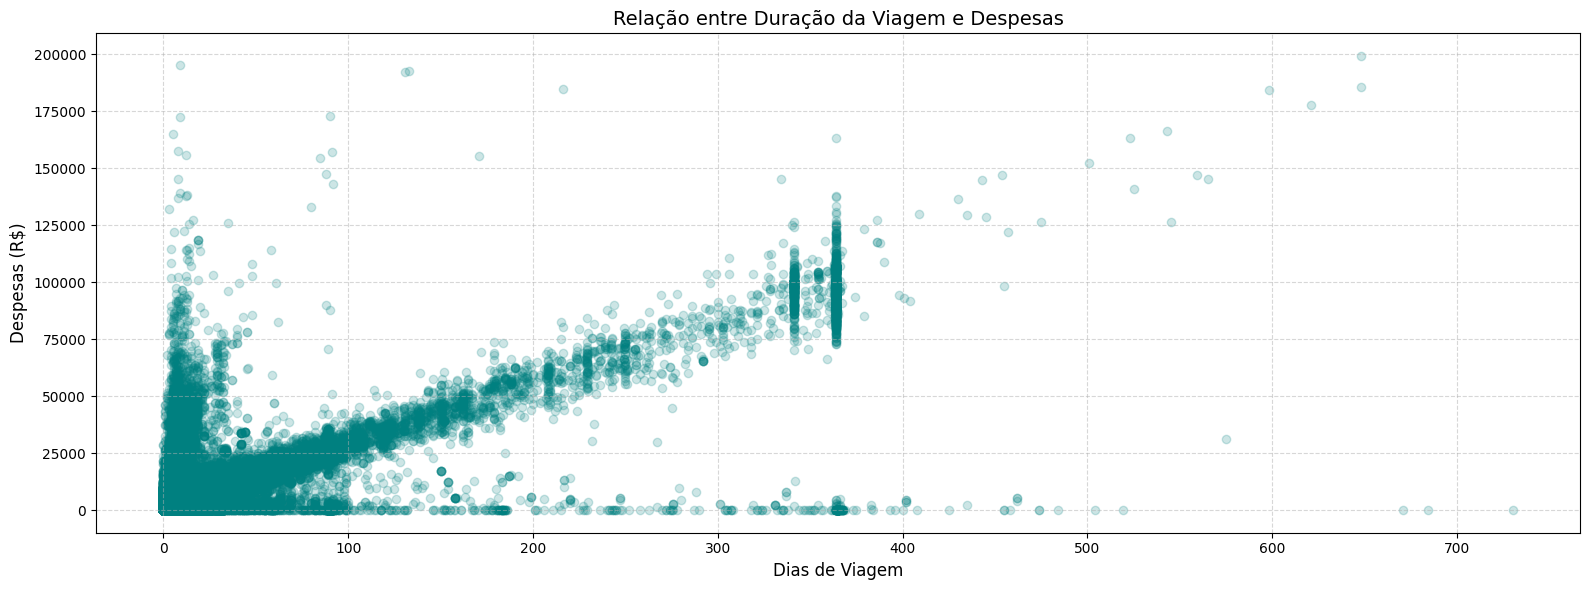

In [72]:
# Create a scatter plot to explore the relationship between trip duration and expenses
fig, ax = plt.subplots(figsize=(16, 6))  # Set up figure and axes with custom size

# Plot each trip as a semi-transparent dot
ax.scatter(df_viagens['Dias de viagem'], df_viagens['Despesas'], alpha=0.2, color='teal')

# Add labels and title
ax.set_title('Relação entre Duração da Viagem e Despesas', fontsize=14)
ax.set_xlabel('Dias de Viagem', fontsize=12)
ax.set_ylabel('Despesas (R$)', fontsize=12)

# Add grid for better readability
ax.grid(True, linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()


In [73]:
# Count how many trips cost more than R$175,000 (True) and how many did not (False)
(df_viagens['Despesas'] > 175_000).value_counts()

,count
Despesas,
False,831003
True,8
